# Error Backpropagation

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
np.set_printoptions(suppress = True, precision = 3)

In [3]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [5]:
y = np.array([0.,1.,1.,0.]).reshape(4,1)

y

array([[0.],
       [1.],
       [1.],
       [0.]])

In [6]:
np.random.seed(2045)

In [7]:
W1 = np.random.rand(3,4)

W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

In [8]:
W2 = np.random.rand(4)

W2 = W2.reshape(4,1)
W2

array([[0.816],
       [0.645],
       [0.044],
       [0.657]])

In [9]:
y_hat = np.random.rand(4).reshape(4,1)

y_hat

array([[0.51 ],
       [0.157],
       [0.382],
       [0.567]])

In [10]:
Layer1 = np.ones([4,4])

Layer1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [11]:
# sigmoid()정의

def sigmoid(x):
  y_hat = 1/(1+np.exp(-x))
  return y_hat

In [12]:
# sigmoid() 미분함수

def d_sigmoid(x):
  dy = x*(1.0-x)
  return dy

In [13]:
# Mean Squared Error
# def loss_function(y, y_hat):
#   Loss = np.mean((y - y_hat) ** 2)
#   return Loss 

In [14]:
# Binary Cross Entropy Error
def loss_function(y, y_hat):
  Loss = -np.mean((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
  return Loss 

# II. 순방향과 역방향 함수 정의

In [17]:
def forwardProp(X,W1,Layer1,W2,y_hat):
  Layer1 = sigmoid(np.dot(X,W1))
  y_hat = sigmoid(np.dot(Layer1,W2))

  return Layer1 , y_hat

In [18]:
def backProp(X, y, y_hat, Layer1, W1, W2):
    d_W2 = np.dot(np.transpose(Layer1), (-2 * (y - y_hat) * d_sigmoid(y_hat)))
    d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
    d_W1 = d_W1 * d_sigmoid(Layer1)
    d_W1 = np.dot(np.transpose(X), d_W1)
    W1 = W1 - 0.8 * d_W1
    W2 = W2 - 0.8 * d_W2
    return y_hat, Layer1, W1, W2


In [19]:
Loss_Record = []


In [21]:
for k in range(0, 1000):
    Layer1, y_hat = forwardProp(X, W1, Layer1, W2, y_hat)
    y_hat, Layer1, W1, W2 = backProp(X, y, y_hat, Layer1, W1, W2)
    
    Loss_Record.append(loss_function(y, y_hat))

In [22]:
W1


array([[ 1.483,  5.843,  5.949, -3.275],
       [ 0.15 ,  5.922, -1.592,  6.282],
       [-0.539, -1.329, -1.018,  0.612]])

In [23]:
W2


array([[-0.529],
       [10.321],
       [-6.468],
       [-6.622]])

In [24]:
y_hat

array([[0.017],
       [0.95 ],
       [0.951],
       [0.059]])

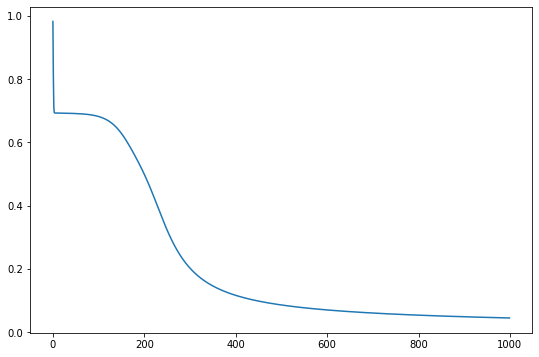

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
plt.plot(Loss_Record)
plt.show()